In [1]:
from matplotlib import rc

plt.style.use('seaborn')
rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

In [2]:
%matplotlib inline

#### 단일 계수 t-검정

In [3]:
from sklearn.datasets import make_regression

X0, y, coef = make_regression(n_samples=100, n_features=1, noise=20,
                              coef=True, random_state=0)
dfX0 = pd.DataFrame(X0, columns=["X1"])
dfX = sm.add_constant(dfX0)
dfy = pd.DataFrame(y, columns=["y"])

model = sm.OLS(dfy, dfX)
result = model.fit()

In [4]:
# std err : 모형 계수의 표준오차
# t : 검정 통계량
# P : 귀무가설이 맞을 확률
# 45% -> H_0 : w = 0 -> w가 0일 가능성이 충분히 높다
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     400.3
Date:                Fri, 15 May 2020   Prob (F-statistic):           2.21e-36
Time:                        11:35:08   Log-Likelihood:                -448.09
No. Observations:                 100   AIC:                             900.2
Df Residuals:                      98   BIC:                             905.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6284      2.163     -0.753      0.4

In [5]:
# 회귀분석 결과 w값이 42.8534가 나옴 -> w가 40정도면 상관없지 않을까
# 귀무가설 : "X1 = 40"  문자열로 입력
# t-검정
# t = (coef - 40) / std err : 단일 계수 t-검정의 검정 통계량
# P : 18% -> 귀무가설 채택함 -> X1의 계수를 40으로 써도 된다
print(result.t_test("X1 = 40"))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            42.8534      2.142      1.332      0.186      38.603      47.104


In [6]:
import datetime
from calendar import isleap

df_nottem = sm.datasets.get_rdataset("nottem").data 

def convert_partial_year(number):
    year = int(number)
    d = datetime.timedelta(days=(number - year) * (365 + isleap(year)))
    day_one = datetime.datetime(year, 1, 1)
    date = d + day_one
    return date

df_nottem["date0"] = df_nottem[["time"]].applymap(convert_partial_year)
df_nottem["date"] = pd.DatetimeIndex(df_nottem["date0"]).round('60min') + datetime.timedelta(seconds=3600*24)
df_nottem["month"] = df_nottem["date"].dt.strftime("%m").astype('category')
del df_nottem["date0"], df_nottem["date"]

model_nottem = sm.OLS.from_formula("value ~ C(month) + 0", df_nottem)
result_nottem = model_nottem.fit()
print(result_nottem.summary())

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     277.3
Date:                Fri, 15 May 2020   Prob (F-statistic):          2.96e-125
Time:                        11:35:28   Log-Likelihood:                -535.82
No. Observations:                 240   AIC:                             1096.
Df Residuals:                     228   BIC:                             1137.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
C(month)[01]    39.6950      0.518     76.691   

In [7]:
# 귀무가설 : w1은 w2 인가?
# P-value 값 49% -> 귀무가설 채택
print(result_nottem.t_test("C(month)[01] = C(month)[02]"))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.5050      0.732      0.690      0.491      -0.937       1.947


In [8]:
# 귀무가설 : w3는 w2 인가?
# P-value 값 0% -> 귀무가설 기각
print(result_nottem.t_test("C(month)[03] = C(month)[02]"))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             3.0050      0.732      4.105      0.000       1.563       4.447


#### 레버리지와 아웃라이어

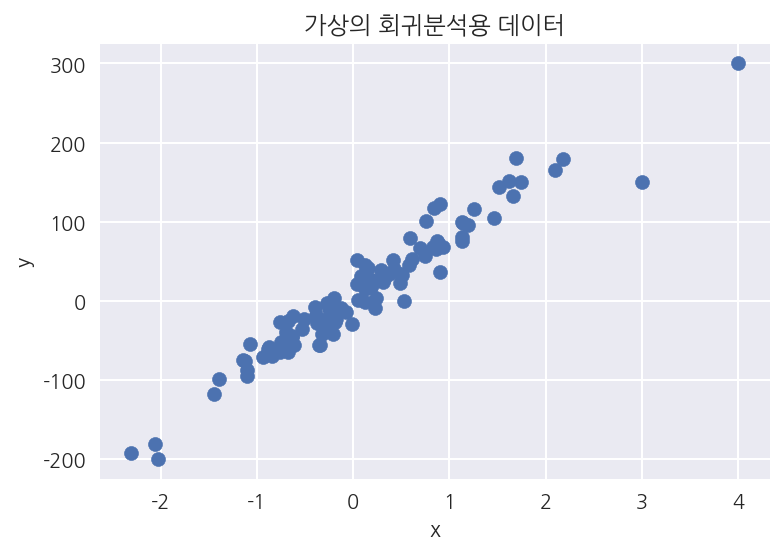

In [10]:
from sklearn.datasets import make_regression

# 100개의 데이터 생성
X0, y, coef = make_regression(n_samples=100, n_features=1, noise=20,
                              coef=True, random_state=1)

# 레버리지가 높은 가상의 데이터를 추가
data_100 = (4, 300)
data_101 = (3, 150)
X0 = np.vstack([X0, np.array([data_100[:1], data_101[:1]])])
X = sm.add_constant(X0)
y = np.hstack([y, [data_100[1], data_101[1]]])

plt.figure(facecolor = "1.")
plt.scatter(X0, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("가상의 회귀분석용 데이터")
plt.show()


In [11]:
# 위의 데이터를 선형회귀한 결과
model = sm.OLS(pd.DataFrame(y), pd.DataFrame(X))
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      0   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     1464.
Date:                Fri, 15 May 2020   Prob (F-statistic):           1.61e-61
Time:                        11:36:22   Log-Likelihood:                -452.71
No. Observations:                 102   AIC:                             909.4
Df Residuals:                     100   BIC:                             914.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0              3.2565      2.065      1.577      0.1

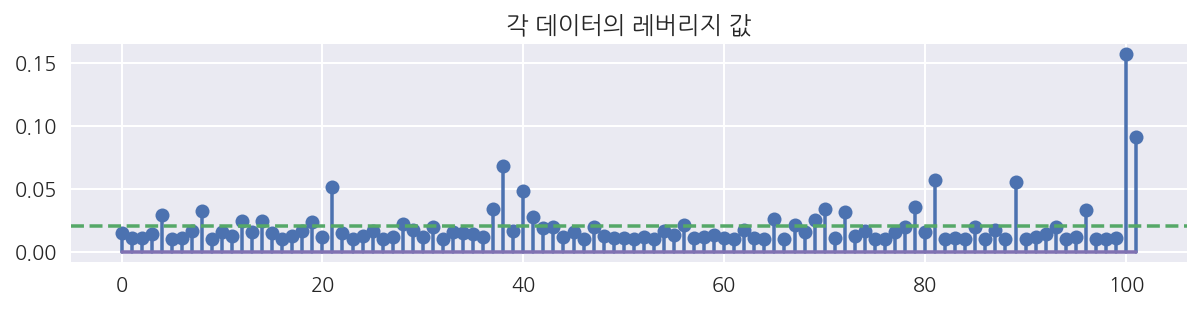

In [13]:
# get_influence() : 영향도 정보 객체
# 이 객체는 hat_matrix_diag 속성 -> 레버리지 벡터의 값을 가지고 있음
influence = result.get_influence()
hat = influence.hat_matrix_diag

plt.figure(figsize = (10, 2), facecolor = "1.")
plt.stem(hat)
#  K / N = 2 / 102 약 0.02
plt.axhline(0.02, c="g", ls="--")
plt.title("각 데이터의 레버리지 값")
plt.show()

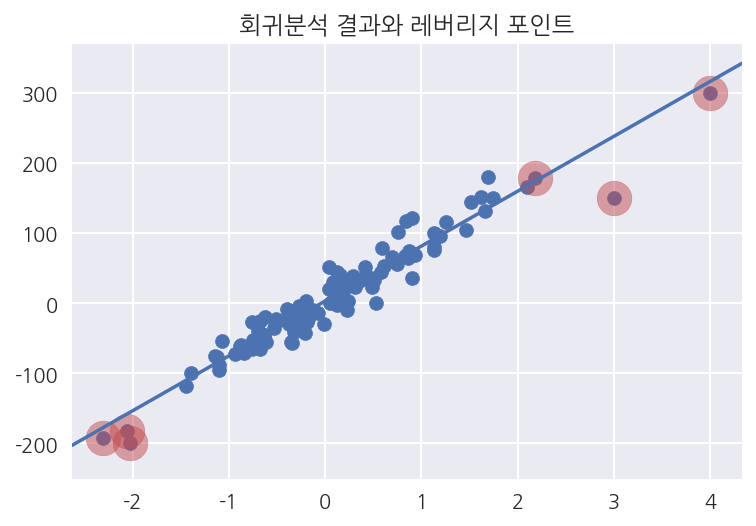

In [16]:
# 레버리지가 큰 값을 표시
# 무리지어 있지 않고 단독으로 존재할수록 레버리지가 커짐
plt.figure(facecolor="1.")
ax = plt.subplot()
plt.scatter(X0, y)
sm.graphics.abline_plot(model_results=result, ax=ax)

idx = hat > 0.05
plt.scatter(X0[idx], y[idx], s=300, c="r", alpha=0.5)
plt.title("회귀분석 결과와 레버리지 포인트")
plt.show()